In [18]:
#Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn import tree

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [19]:
df = pd.read_csv('datasets/pcos_Modified.csv', sep=";")
#df.info()
#df.columns
#print percentage of missing values for each column

res = df.columns
for col in res:
    print(col, df[col].isna().mean())

df = df.dropna()



Unnamed: 0 0.0
Age 0.02
BMI 0.033
Menstrual_Irregularity 0.019
Testosterone_Level(ng/dL) 0.027
Antral_Follicle_Count 0.03
PCOS_Diagnosis 0.018


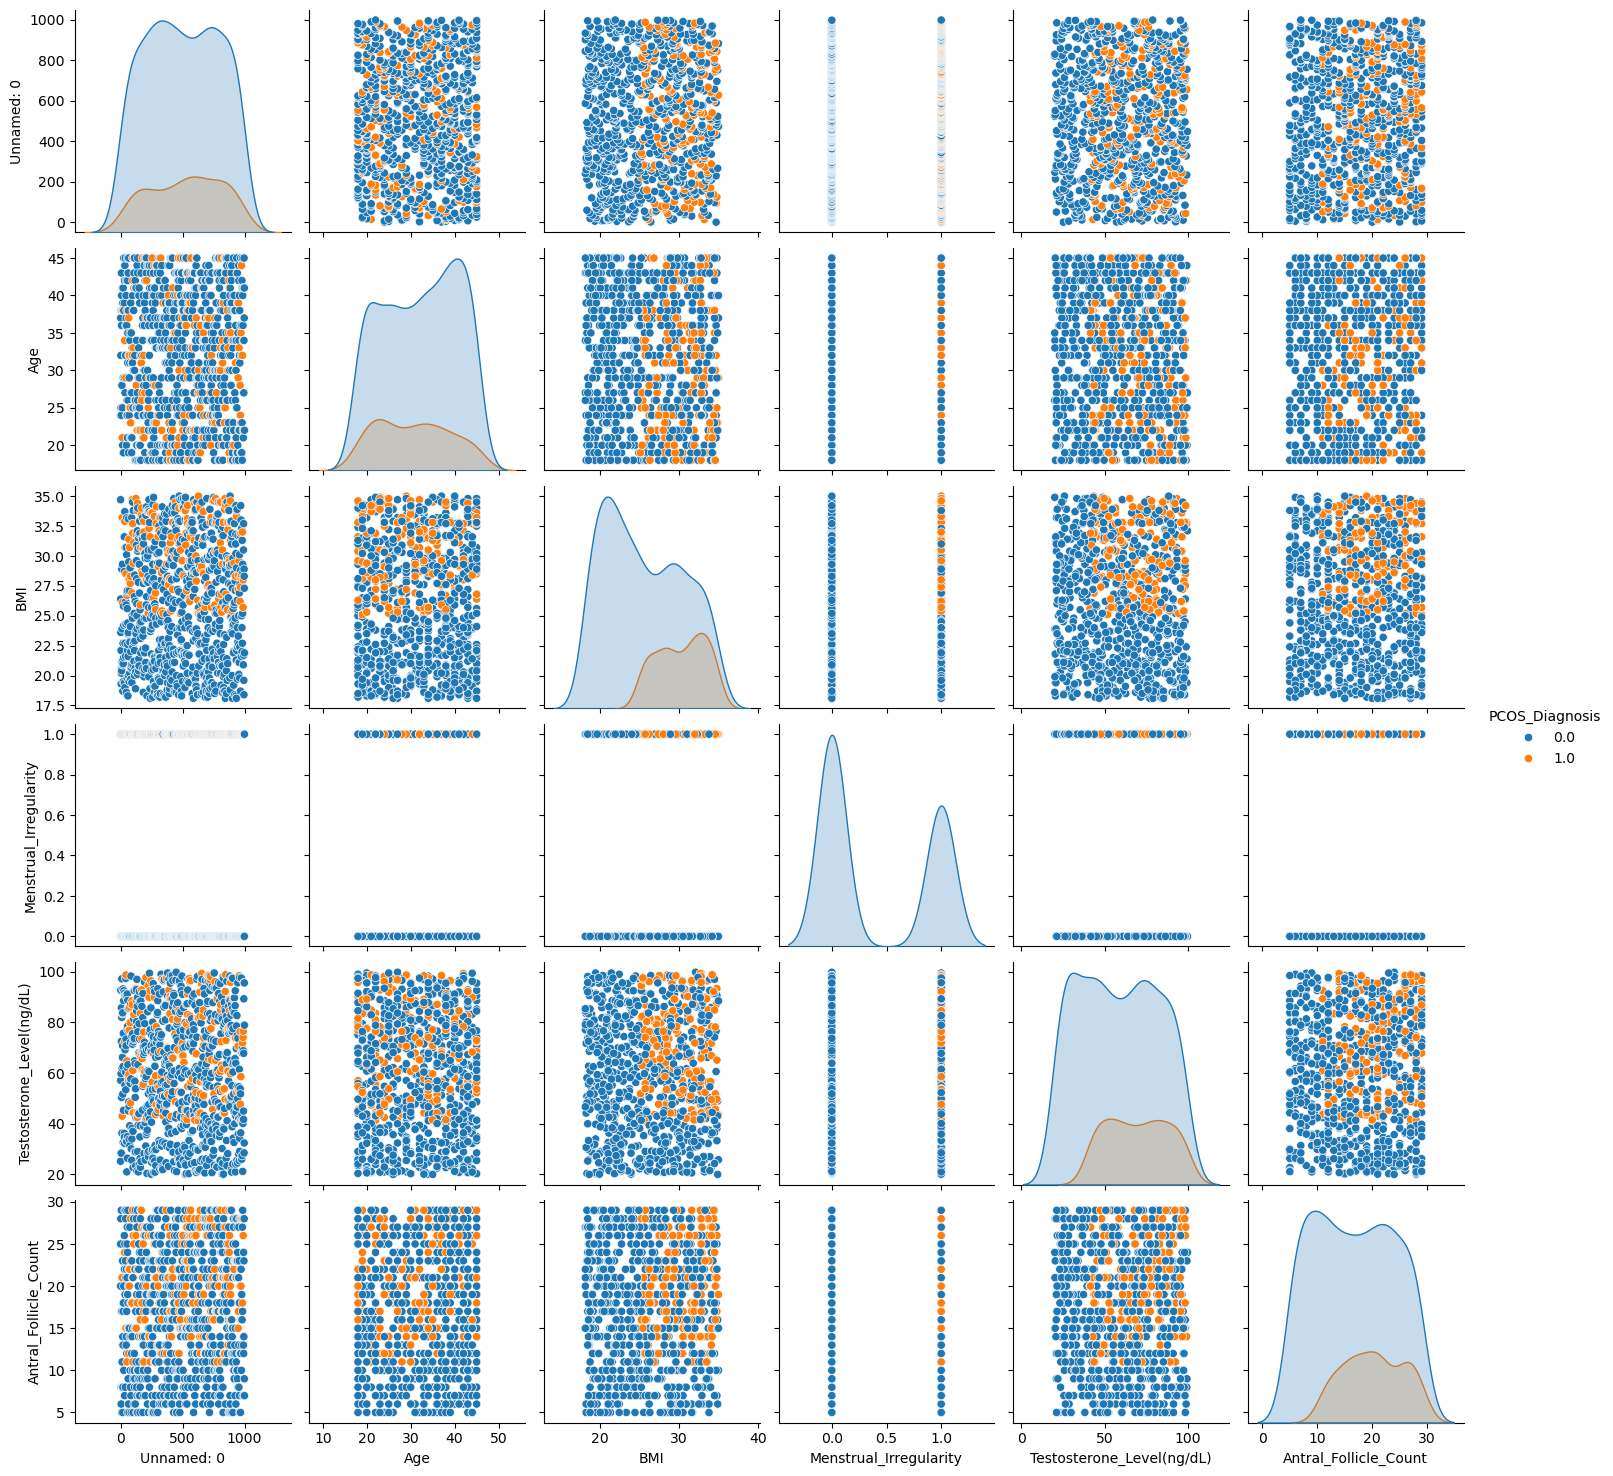

In [20]:
sns.pairplot(df, hue="PCOS_Diagnosis")

In [ ]:
variablex = df[["Testosterone_Level(ng/dL)", "BMI", "Menstrual_Irregularity", "Antral_Follicle_Count"]].values
variabley = df["PCOS_Diagnosis"]
x_train, x_test, y_train, y_test = train_test_split(variablex, variabley, test_size=0.2, random_state=42)

In [22]:
# model = RandomForestClassifier(random_state=42, oob_score=True)
model = RandomForestClassifier(criterion='gini',
                               max_features='sqrt',
                               bootstrap=True,
                               max_samples=2/3,
                               oob_score=True, 
                               max_depth=5)
print(model.get_params())
model.fit(x_train, y_train)

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': 0.6666666666666666, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': True, 'random_state': None, 'verbose': 0, 'warm_start': False}


RandomForestClassifier(max_depth=5, max_samples=0.6666666666666666,
                       oob_score=True)

In [23]:
print(f"El puntaje obtenido es: {model.oob_score_*100}%")
y_pred = model.predict(x_test)
f1 = f1_score(y_test, y_pred, average='macro')
print(f"El puntaje F1 obtenido es: {f1}")
percent = model.score(x_test, y_test)
print(f"El porcentaje de aciertos es: {percent*100}%")

El puntaje obtenido es: 99.85569985569985%
El puntaje F1 obtenido es: 1.0
El porcentaje de aciertos es: 100.0%


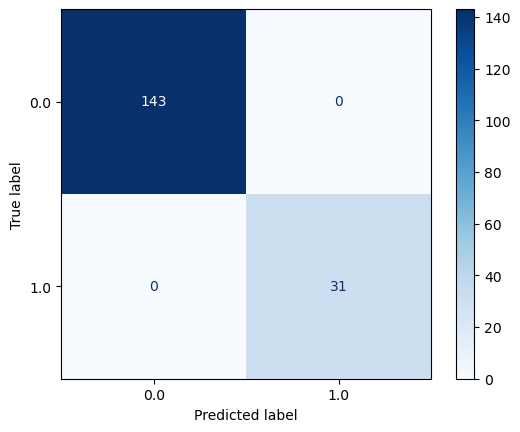

In [24]:
conf_matrix = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(conf_matrix, display_labels=model.classes_)
cm_display.plot(cmap=plt.cm.Blues)
plt.show()